### EDA 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Thống kê cơ bản của dữ liệu:
                count      mean       std  min       25%       50%       75%  \
rating         1452.0  0.455771  0.482402  0.0  0.000000  0.000000  0.980000   
comment_count  1452.0  0.014441  0.059503  0.0  0.000000  0.000000  0.004497   
price          1452.0  0.032268  0.081533  0.0  0.002851  0.008343  0.022205   
sold           1452.0  0.152442  0.222496  0.0  0.008032  0.049197  0.193775   

               max  variance  
rating         1.0  0.232711  
comment_count  1.0  0.003541  
price          1.0  0.006648  
sold           1.0  0.049504  


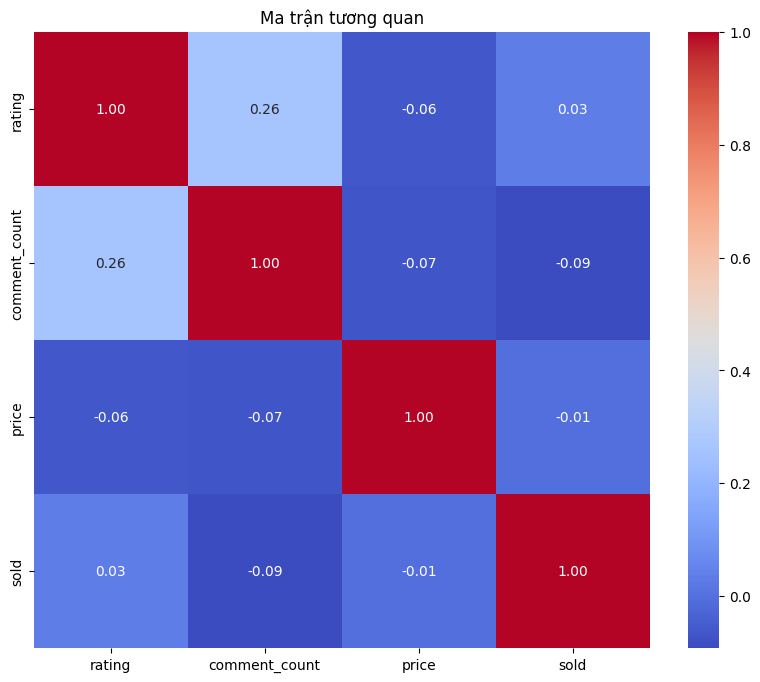

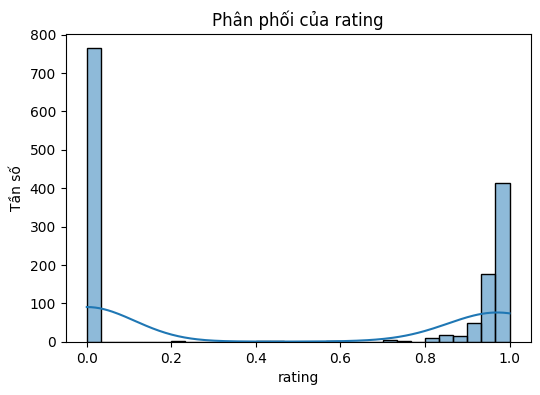

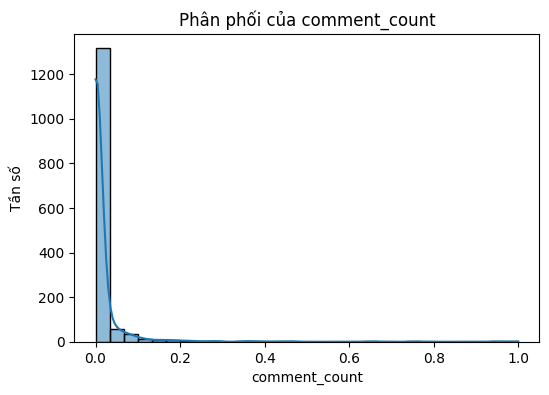

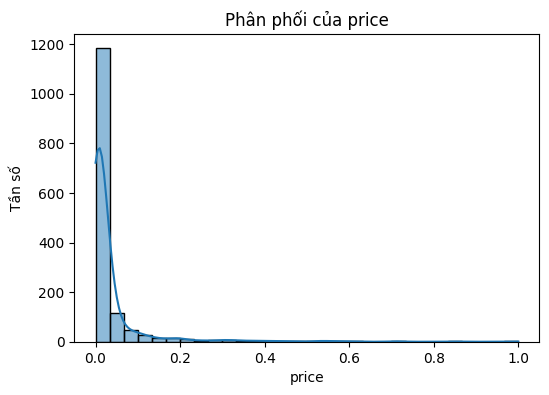

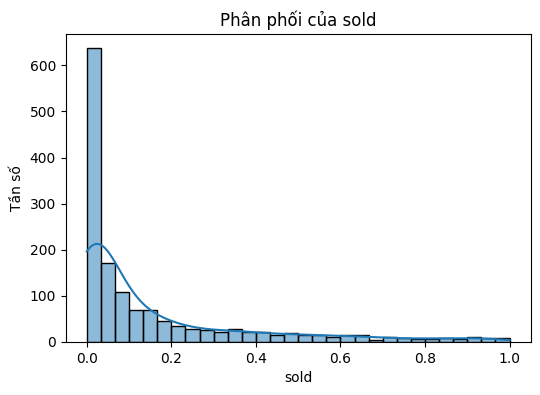

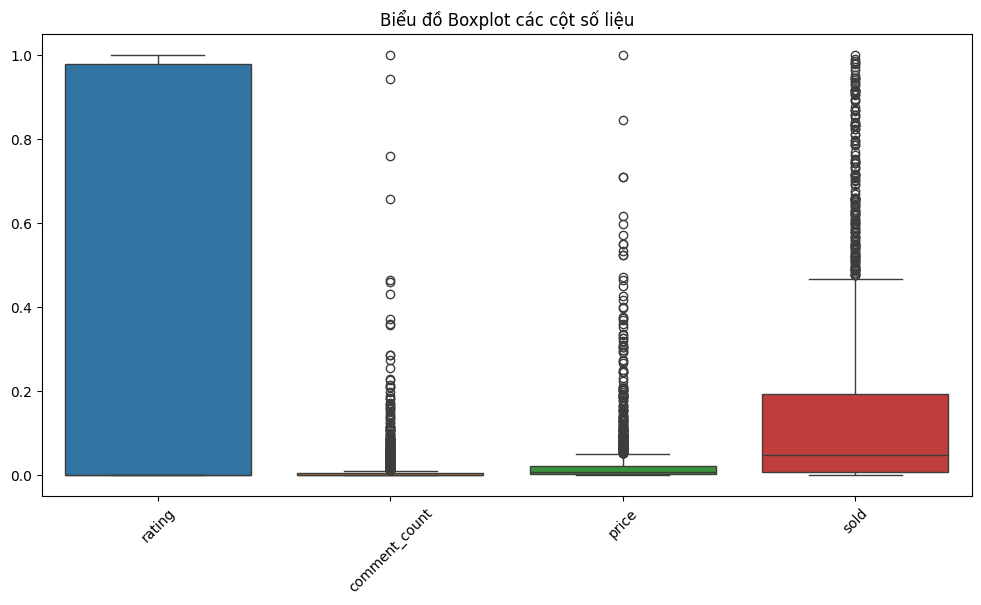

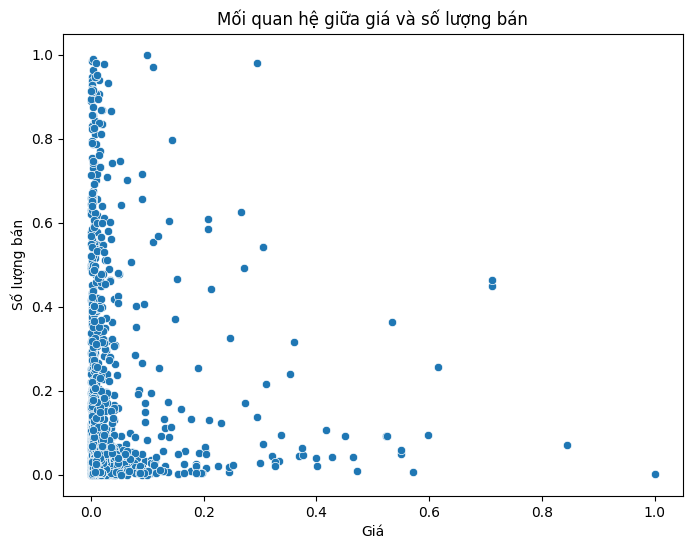

In [5]:
# Đọc dữ liệu từ file normalization.csv
file_path = 'normalization.csv'
data = pd.read_csv(file_path)

# Loại bỏ cột product_name
if 'product_name' in data.columns:
    data = data.drop(columns=['product_name'])

# 1. Tóm tắt thống kê cơ bản
summary_stats = data.describe().T
summary_stats['variance'] = data.var()  # Thêm phương sai
print("Thống kê cơ bản của dữ liệu:")
print(summary_stats)

# 2. Vẽ ma trận tương quan
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Ma trận tương quan")
plt.show()

# 3. Vẽ biểu đồ phân phối (Histogram) cho các cột số liệu
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Phân phối của {column}")
    plt.xlabel(column)
    plt.ylabel("Tần số")
    plt.show()

# 4. Vẽ Boxplot để kiểm tra ngoại lệ
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.title("Biểu đồ Boxplot các cột số liệu")
plt.xticks(rotation=45)
plt.show()

# 5. Vẽ Scatterplot giữa các cặp cột quan trọng (nếu tồn tại)
if 'price' in data.columns and 'sold' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='price', y='sold', data=data)
    plt.title("Mối quan hệ giữa giá và số lượng bán")
    plt.xlabel("Giá")
    plt.ylabel("Số lượng bán")
    plt.show()